In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\\Laurence\\Documents\\Data sets\\BC data\\data.csv")

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [79]:
df=df.drop('Unnamed: 32', axis=1)
df=df.drop('id', axis=1)

In [80]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [81]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

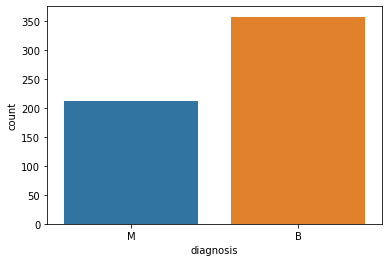

In [82]:
sns.countplot(x=df['diagnosis'])

In [83]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x=='M' else 0)

In [84]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

<AxesSubplot:>

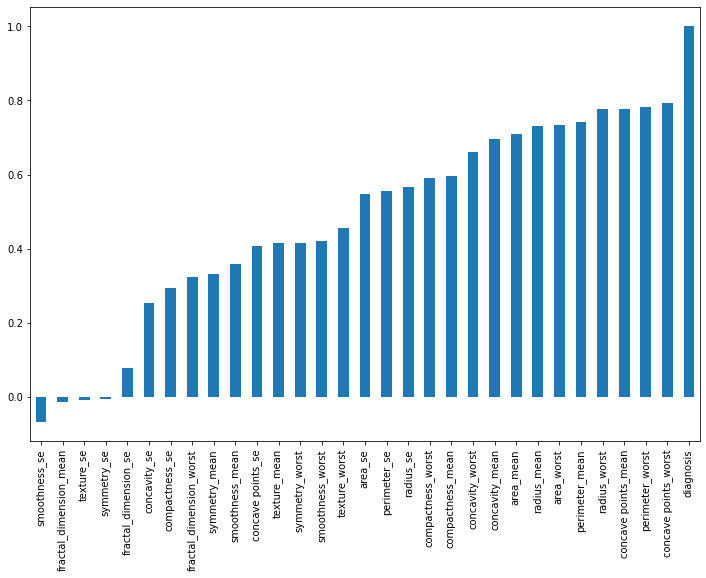

In [85]:
plt.figure(figsize = (12, 8))
df.corr()['diagnosis'].sort_values().plot(kind='bar')

<AxesSubplot:>

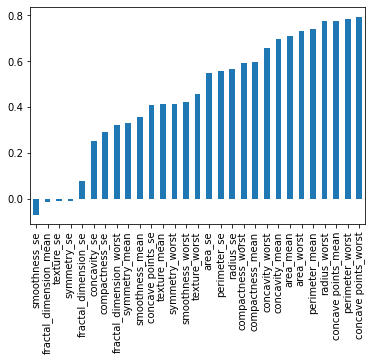

In [86]:
# to drop the diagnosis column include [:-1] - this is saying to grab everythng except for the last bit of data
# that was how it went in the tutorial, but i had to go the other way around and use [2:]

df.corr()['diagnosis'][2:].sort_values().plot(kind='bar')

<AxesSubplot:>

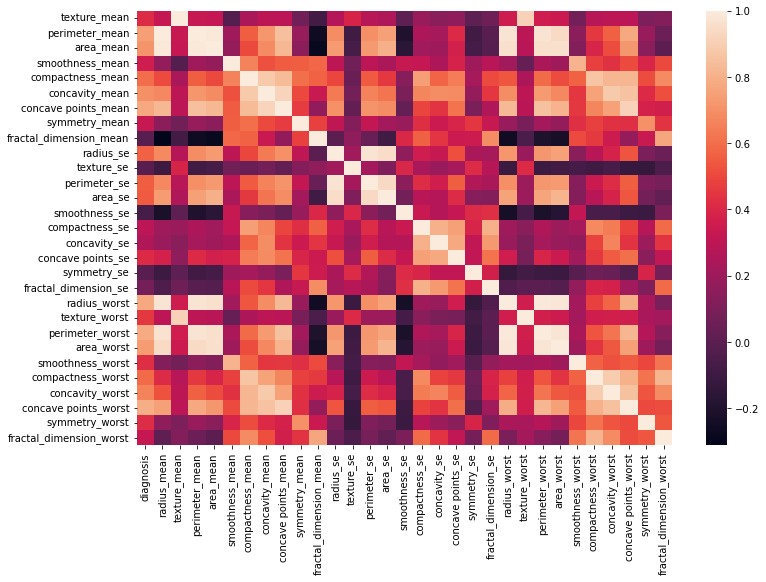

In [87]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr()[2:]) # this says to ignore the first two columns

In [88]:
X = df.drop('diagnosis', axis=1).values   # remeber values

Y = df['diagnosis'].values

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=101)

In [90]:
Y_test.shape

(143,)

In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [93]:
X_train.shape

(426, 30)

In [94]:
# got 31 columns (not the same as the tutorial) so we can start wityh this number of neurons

model = Sequential()
model.add(Dense (30, activation='relu'))
model.add(Dense (15, activation='relu'))  # not sure why the tutorial reduces the neurons in this layer, maybe just because the neuron / rows ratio is high
model.add(Dense (1, activation='sigmoid')) # output layer - note this is a BINARY CLASSIFICATION problem

model.compile(loss='binary_crossentropy', optimizer='adam')


In [95]:
model.fit(x=X_train, y=Y_train, epochs=600,
          validation_data=(X_test, Y_test))   # note that 600 epochs was done so that we can see an overfitted model

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.6733 - val_loss: 0.6434
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6276 - val_loss: 0.5982
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5830 - val_loss: 0.5519
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5380 - val_loss: 0.4984
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4866 - val_loss: 0.4463
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4368 - val_loss: 0.3955
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3863 - val_loss: 0.3392
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3410 - val_loss: 0.3019
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3098 - val_loss: 0.2705
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2787 - val_loss: 0.2501
Epoch 11

<AxesSubplot:>

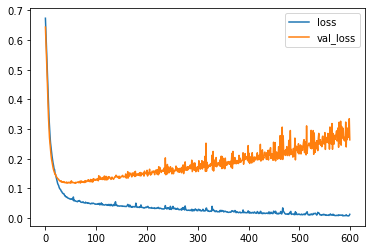

In [96]:
losses = pd.DataFrame(model.history.history)   #not sure what i fixed, probably just removed the right junk from the data
losses.plot()

In [99]:
# This graph shpws that the model is really overfitted - loss on the validation is going up  after about 50 epochs, which the training data keeps going down

# to prevent this, we can use early stopping, which monitors the training process and stops it if the val_loss starts to increase

from tensorflow.keras.callbacks import EarlyStopping

early_stop =EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
# monitor is the performance metric we're interested in
# mode is what we want to do with that -e.g. minimise loss
# patience takes noise into account and is the number of epochs of worsening performance we will tolerate before stopping the training

model = Sequential()
model.add(Dense (30, activation='relu'))
model.add(Dense (15, activation='relu'))  # not sure why the tutorial reduces the neurons in this layer, maybe just because the neuron / rows ratio is high
model.add(Dense (1, activation='sigmoid')) # output layer - note this is a BINARY CLASSIFICATION problem

model.compile(loss='binary_crossentropy', optimizer='adam')


model.fit(x=X_train, y=Y_train, epochs=600,
          validation_data=(X_test, Y_test),
         verbose =1,
         callbacks=[early_stop])   # callbacks is our early stopping function defined above. Square brackets as passing it in as a list

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.6953 - val_loss: 0.6556
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6402 - val_loss: 0.6069
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5951 - val_loss: 0.5625
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5506 - val_loss: 0.5176
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5079 - val_loss: 0.4742
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4644 - val_loss: 0.4286
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4229 - val_loss: 0.3878
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3832 - val_loss: 0.3459
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3479 - val_loss: 0.3097
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3166 - val_loss: 0.2815
Epoch 11

In [100]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

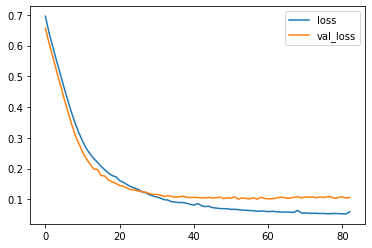

In [101]:
model_loss.plot()

In [102]:
# validationn loss flattened out, which the model could tolerate for a while, but the model was stopped once vla_loss started to increase

# can also use drop-out laters, which arbitrarily switch off neurons
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense (30, activation='relu'))
model.add(Dropout (0.5))  # this line is saying in each epoch, 50% of neurons should eb randomly selected and switched off. Note this would be a different 50% each time.
# Typical values for dropout are between 0.25 and 0.5
model.add(Dense (15, activation='relu'))  # not sure why the tutorial reduces the neurons in this layer, maybe just because the neuron / rows ratio is high
model.add(Dropout (0.5))
model.add(Dense (1, activation='sigmoid')) # output layer - note this is a BINARY CLASSIFICATION problem

model.compile(loss='binary_crossentropy', optimizer='adam')


model.fit(x=X_train, y=Y_train, epochs=600,
          validation_data=(X_test, Y_test),
         verbose =1,
         callbacks=[early_stop])   # note, can still use early stopping with this

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.7183 - val_loss: 0.6702
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6796 - val_loss: 0.6601
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6784 - val_loss: 0.6499
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6605 - val_loss: 0.6336
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6426 - val_loss: 0.6141
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6215 - val_loss: 0.5876
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6116 - val_loss: 0.5584
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5913 - val_loss: 0.5313
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5555 - val_loss: 0.5013
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5292 - val_loss: 0.4682
Epoch 11

In [103]:
# got a few more epochs out of it this time. This suggests the model is still 'learning' up to now

model_loss_n = pd.DataFrame(model.history.history)



<AxesSubplot:>

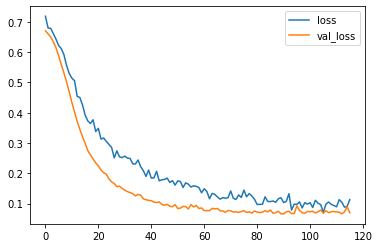

In [104]:
model_loss_n.plot()

In [108]:
# big improvement!
# Now for full evaluation

#predictions = model.predict_classes(X_test)   #using this becasue we are dealing with a classification problem
# THE LINE ABOVE DOES NOT WORK ANYMORE APPARENTLY

predictions = model.predict(X_test)
predictions = np.round(predictions).astype(int)   # so need two lines to make predictions and make them into binary

#y_hat = [0 if val < 0.5 else 1 for val in y_hat]  # can also use this line from the Aussie guy

5/5 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(Y_test, predictions))   # very good performance

In [116]:
print(confusion_matrix(Y_test, predictions))

[[86  2]
 [ 1 54]]


In [ ]:
# so the model only mislabelled 3 rows wrongly